In [4]:
# Step 1: Install necessary libraries
!pip install pandas matplotlib seaborn scikit-learn tensorflow


In [5]:
# Step 2: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [6]:
# Step 3: Load data
historic_data = pd.read_csv("historic.csv")
prediction_data = pd.read_csv("prediction_input.csv")

   item_no    category      main_promotion  color  stars success_indicator
0   739157       Tunic             Catalog  Green    3.1              flop
1   591846      Hoodie  Category_Highlight    Red    1.5              flop
2   337574  Sweatshirt             Catalog    Red    4.4               top
3   401933  Polo-Shirt  Category_Highlight   Blue    3.1              flop
4   812151      Hoodie  Category_Highlight  Green    4.1               top
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_no            8000 non-null   int64  
 1   category           8000 non-null   object 
 2   main_promotion     8000 non-null   object 
 3   color              8000 non-null   object 
 4   stars              8000 non-null   float64
 5   success_indicator  8000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 375.1+

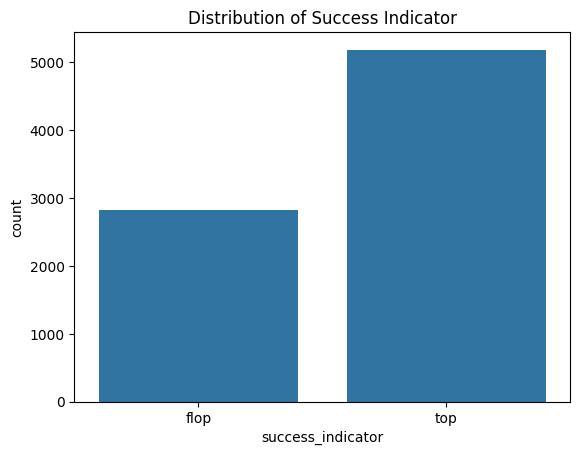

In [7]:
# Step 4: Exploratory Data Analysis (EDA)
print(historic_data.head())
print(historic_data.info())

# Visualization
sns.countplot(x='success_indicator', data=historic_data)
plt.title('Distribution of Success Indicator')
plt.show()

In [8]:
# Step 5: Preprocessing
# Fill missing values
historic_data.fillna(method='ffill', inplace=True)
prediction_data.fillna(method='ffill', inplace=True)
# Encode categorical variables
historic_data = pd.get_dummies(historic_data, columns=['category', 'main_promotion', 'color'])
prediction_data = pd.get_dummies(prediction_data, columns=['category', 'main_promotion', 'color'])
# Standardize features
scaler = StandardScaler()
historic_data_scaled = scaler.fit_transform(historic_data.drop(columns=['success_indicator', 'item_no']))
prediction_data_scaled = scaler.transform(prediction_data.drop(columns=['item_no']))

In [9]:
# Step 6: Modeling (Artificial Neural Network)
class ANNModel:
    def __init__(self):
        self.model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(1, activation='sigmoid')
        ])
        self.model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    def train(self, X, y):
        self.model.fit(X, y, epochs=50, batch_size=32, validation_split=0.2)

    def evaluate(self, X, y):
        loss, accuracy = self.model.evaluate(X, y)
        print("Testing Loss:", loss)
        print("Testing Accuracy:", accuracy)

    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype("int32")

# Convert categorical labels to binary
historic_data['success_indicator'] = historic_data['success_indicator'].map({'flop': 0, 'top': 1})

# Split training data
X_train, X_test, y_train, y_test = train_test_split(historic_data_scaled, historic_data['success_indicator'], test_size=0.2, random_state=42)

# Instantiate and train ANN model
ann_model = ANNModel()
ann_model.train(X_train, y_train)

# Evaluate model on testing data
print("\nTesting Performance:")
ann_model.evaluate(X_test, y_test)

Epoch 1/50
160/160 [==============================] - 1s 3ms/step - loss: 0.6561 - accuracy: 0.6297 - val_loss: 0.5090 - val_accuracy: 0.8070
Epoch 2/50
160/160 [==============================] - 1s 4ms/step - loss: 0.5137 - accuracy: 0.7775 - val_loss: 0.4545 - val_accuracy: 0.8328
Epoch 3/50
160/160 [==============================] - 1s 4ms/step - loss: 0.4744 - accuracy: 0.8023 - val_loss: 0.4382 - val_accuracy: 0.8367
Epoch 4/50
160/160 [==============================] - 1s 5ms/step - loss: 0.4599 - accuracy: 0.8189 - val_loss: 0.4315 - val_accuracy: 0.8484
Epoch 5/50
160/160 [==============================] - 1s 5ms/step - loss: 0.4548 - accuracy: 0.8213 - val_loss: 0.4247 - val_accuracy: 0.8508
Epoch 6/50
160/160 [==============================] - 1s 7ms/step - loss: 0.4464 - accuracy: 0.8309 - val_loss: 0.4236 - val_accuracy: 0.8531
Epoch 7/50
160/160 [==============================] - 1s 5ms/step - loss: 0.4416 - accuracy: 0.8283 - val_loss: 0.4201 - val_accuracy: 0.8539
Epoch 

63/63 [==============================] - 0s 1ms/step
Total Top Entries: [1395]
Total Flop Entries: [605]


<ipython-input-10-c14cbbc021f1>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=predictions.flatten(), palette='viridis')


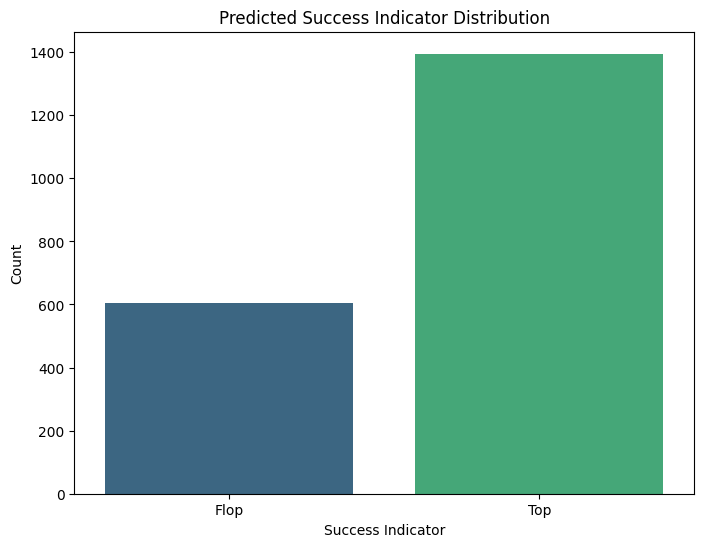

In [10]:
# Step 7: Predictions on prediction_input.csv
# Make predictions using the trained model
predictions = ann_model.predict(prediction_data_scaled)

# Display predictions for each input entry
top_count = sum(predictions == 1)
flop_count = sum(predictions == 0)
print(f"Total Top Entries: {top_count}")
print(f"Total Flop Entries: {flop_count}")

# Visualize the counts
plt.figure(figsize=(8, 6))
sns.countplot(x=predictions.flatten(), palette='viridis')
plt.title('Predicted Success Indicator Distribution')
plt.xlabel('Success Indicator')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Flop', 'Top'])
plt.show()
